# Mean Value T Test

## one_mean_test

### Parameter:
+ data (np.ndarray): test data
+ expected_mean (np.ndarray, optional): expected mean. Defaults to None.
+ *param: parameter transports to sts.ttest_1samp

### Raises:
+ ValueError: expected_mean shape can match data

### Returns:
+ origin_mean,pvalue : np.ndarray: origin_mean and res.value

### Example

In [8]:
import sacpy as scp
import numpy as np
import matplotlib.pyplot as plt
sst = scp.load_sst()["sst"]
ssta = scp.get_anom(sst, method=0)
ssta_djf = scp.XrTools.spec_moth_yrmean(ssta,[12,1,2])

<xarray.DataArray 'sst' ()>
array(0.93506366)


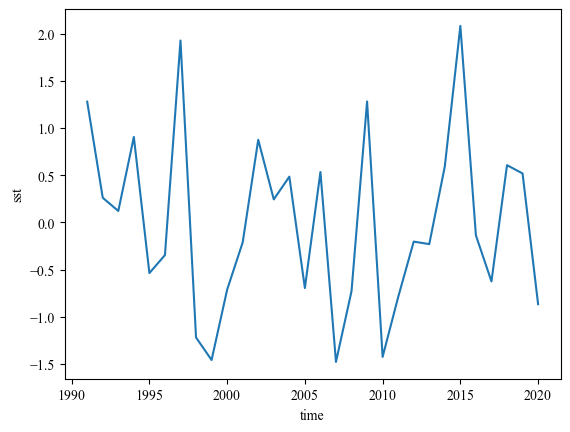

In [9]:
Nino34 = ssta_djf.loc[:, -5:5, 190:240].mean(axis=(1, 2))
print(Nino34.std())
Nino34.plot()

In [10]:
select = Nino34 >= 1
ssta_sl = ssta_djf[select]
mean, pv = scp.one_mean_test(np.array(ssta_sl))

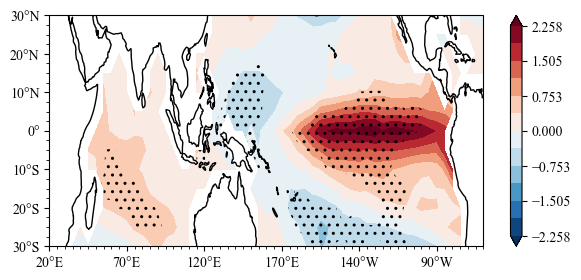

In [11]:
import sacpy.Map
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,mean)
n = ax.sig_plot(lon,lat,pv,color="k",marker="..")
ax.init_map(stepx=50, smally=2.5)
plt.colorbar(m)

## two_mean_test

two samples t test

### Parameter
+ data1 (np.ndarray): test data1
+ data2 (np.ndarray): test data2


### Returns:
+ mean_diff (np.ndarray): mean difference
+ pvalue (np.ndarray): p-value of t-test

### Example

#### Load Modules and SST data

In [16]:
import sacpy as scp
import numpy as np
import matplotlib.pyplot as plt

sst = scp.load_sst()["sst"]
ssta = scp.get_anom(sst, method=0)
ssta_djf = scp.XrTools.spec_moth_yrmean(ssta,[12,1,2])
Nino34 = ssta_djf.loc[:, -5:5, 190:240].mean(axis=(1, 2))

#### Select Normal and Super El nino Cases

In [14]:
select1 = (Nino34 >= 0.8) & (Nino34 < 1.1)
ssta_sl1 = ssta_djf[select1]
select2 = Nino34 >= 1.3
ssta_sl2 = ssta_djf[select2]

# cal difference
mean_diff, pv2 = scp.two_mean_test(ssta_sl2,ssta_sl1)

#### Plot the results

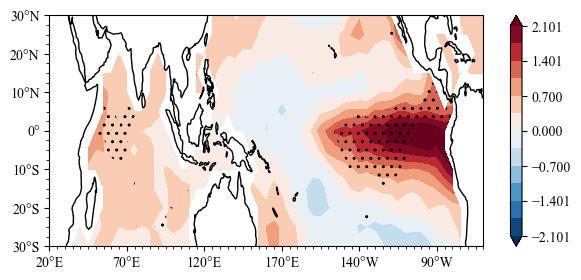

In [15]:
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,mean_diff)
n = ax.sig_plot(lon,lat,pv2,color="k",marker="..")
ax.init_map(stepx=50, smally=2.5)
plt.colorbar(m)